In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

#from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


data_2016 = pd.read_csv('./Beijing_2016_HourlyPM25_created20170103.csv')
data_2015 = pd.read_csv('./Beijing_2015_HourlyPM25_created20160201.csv')
data_2014 = pd.read_csv('./Beijing_2014_HourlyPM25_created20150203.csv')
data_2013 = pd.read_csv('./Beijing_2013_HourlyPM2.5_created20140325.csv')
data_2012 = pd.read_csv('./Beijing_2012_HourlyPM2.5_created20140325.csv')
data_2011 = pd.read_csv('./Beijing_2011_HourlyPM25_created20140709.csv')
data_2010 = pd.read_csv('./Beijing_2010_HourlyPM25_created20140709.csv')
data_2009 = pd.read_csv('./Beijing_2009_HourlyPM25_created20140709.csv')
data_2008 = pd.read_csv('./Beijing_2008_HourlyPM2.5_created20140325.csv')


In [260]:
# Concatenate all data sets
data_sets = [data_2008 , data_2009, data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016]
pm25 = pd.concat(data_sets)

In [3]:
pm25.shape

(74471, 11)

In [4]:
pm25.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,4/8/08 15:00,2008,4,8,15,207,�g/mg_,1 Hr,Valid
1,Beijing,PM2.5,4/8/08 16:00,2008,4,8,16,180,�g/mg_,1 Hr,Valid
2,Beijing,PM2.5,4/8/08 17:00,2008,4,8,17,152,�g/mg_,1 Hr,Valid
3,Beijing,PM2.5,4/8/08 18:00,2008,4,8,18,162,�g/mg_,1 Hr,Valid
4,Beijing,PM2.5,4/8/08 19:00,2008,4,8,19,171,�g/mg_,1 Hr,Valid


In [5]:
for n in range(1, 13):
    print 'Month ', n
    print pm25[pm25.Month == n].shape

Month  1
(5952, 11)
Month  2
(5424, 11)
Month  3
(5952, 11)
Month  4
(6297, 11)
Month  5
(6696, 11)
Month  6
(6480, 11)
Month  7
(6696, 11)
Month  8
(6696, 11)
Month  9
(6480, 11)
Month  10
(6696, 11)
Month  11
(5894, 11)
Month  12
(5208, 11)


 ## Check whether data is complete
 
 Data range : 2008/4/8 15:00 - 2016/11/30 23:00

 Apr - Nov : 9 years
     
     31*24*9 = 6696 
     May  
     July
     Aug
     Oct 
     
     30*24*9 = 6480
     June
     Sept
     Nov (only 134 rather than 720 records for 2008. investigate)
     
     Apr = 30*24*8 + 22*24 + 9 = 6297
    
 Dec - Mar : 8 years
    
    31*24*8 = 5952
    Dec = 31*24*7  = 5208(missing 2008 and 2016 data)
    Jan
    Mar
    
    Feb = 28*24*8 + 2*24 = 5424


In [6]:
test = pm25[(pm25.Month == 11) | (pm25.Month == 12)]

In [7]:
test.Year.value_counts()

2015    1464
2014    1464
2013    1464
2012    1464
2011    1464
2010    1464
2009    1464
2016     720
2008     134
Name: Year, dtype: int64

In [8]:
nov = pm25[(pm25.Month == 11)]
dec = pm25[(pm25.Month == 12)]

## Only 134 Nov data points for 2008 - Full days Nov 1-5, Nov 6 0:00 - 13:00

In [9]:
nov.Year.value_counts()

2015    720
2011    720
2014    720
2010    720
2013    720
2009    720
2016    720
2012    720
2008    134
Name: Year, dtype: int64

In [10]:
nov[nov.Year == 2008]['Day'].value_counts()

5    24
4    24
3    24
2    24
1    24
6    14
Name: Day, dtype: int64

In [11]:
nov[(nov.Year == 2008)&(nov.Day == 6)]['Hour']

5073     0
5074     1
5075     2
5076     3
5077     4
5078     5
5079     6
5080     7
5081     8
5082     9
5083    10
5084    11
5085    12
5086    13
Name: Hour, dtype: int64

## No December data for 2008 and 2016

In [12]:
dec.Year.value_counts()

2015    744
2011    744
2014    744
2010    744
2013    744
2009    744
2012    744
Name: Year, dtype: int64

## Now investigate invalid data

In [13]:
pm25.Value.describe().T

count    74471.000000
mean        27.388970
std        271.601833
min       -999.000000
25%         22.000000
50%         62.000000
75%        122.000000
max        994.000000
Name: Value, dtype: float64

In [14]:
pm25.groupby('Value').count().reset_index().iloc[:,0:2]

,Value,Site
0,-999,4429
1,-15,5
2,-4,1
3,-3,1
4,-2,6
5,-1,11
6,0,15
7,1,28
8,2,68
9,3,121


In [15]:
invalid_values = pm25[pm25.Value <0]
invalid_values.head(2)

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
694,Beijing,PM2.5,5/7/08 13:00,2008,5,7,13,-999,�g/mg_,1 Hr,Missing
695,Beijing,PM2.5,5/7/08 14:00,2008,5,7,14,-999,�g/mg_,1 Hr,Missing


In [16]:
invalid_values.shape

(4453, 11)

In [17]:
# Make 'Date' column that excludes hours of the day
invalid_values['Date'] = invalid_values['Date (LST)'].apply(lambda x: x[0:-5].strip())
invalid_values.head(30)

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
694,Beijing,PM2.5,5/7/08 13:00,2008,5,7,13,-999,�g/mg_,1 Hr,Missing,5/7/08
695,Beijing,PM2.5,5/7/08 14:00,2008,5,7,14,-999,�g/mg_,1 Hr,Missing,5/7/08
863,Beijing,PM2.5,5/14/08 14:00,2008,5,14,14,-999,�g/mg_,1 Hr,Missing,5/14/08
864,Beijing,PM2.5,5/14/08 15:00,2008,5,14,15,-999,�g/mg_,1 Hr,Missing,5/14/08
1027,Beijing,PM2.5,5/21/08 10:00,2008,5,21,10,-999,�g/mg_,1 Hr,Missing,5/21/08
1028,Beijing,PM2.5,5/21/08 11:00,2008,5,21,11,-999,�g/mg_,1 Hr,Missing,5/21/08
2179,Beijing,PM2.5,7/8/08 10:00,2008,7,8,10,-999,�g/mg_,1 Hr,Missing,7/8/08
2180,Beijing,PM2.5,7/8/08 11:00,2008,7,8,11,-999,�g/mg_,1 Hr,Missing,7/8/08
2203,Beijing,PM2.5,7/9/08 10:00,2008,7,9,10,-999,�g/mg_,1 Hr,Missing,7/9/08
2204,Beijing,PM2.5,7/9/08 11:00,2008,7,9,11,-999,�g/mg_,1 Hr,Missing,7/9/08


In [160]:
# 11/6/2008 only had 14 data points
incomplete_day = pd.DataFrame([['11/6/08', 10]], columns=['Date', 'Site'])
incomplete_day

,Date,Site
0,11/6/08,10


In [203]:
invalid_dates = invalid_values.groupby('Date').count().reset_index().iloc[:,0:2]
invalid_dates = invalid_dates.append(incomplete_day, ignore_index=True)
invalid_dates = invalid_dates.rename(columns={'Site':'Missing_value_counts'})
invalid_dates.head()

,Date,Missing_value_counts
0,1/1/09,24
1,1/1/10,23
2,1/1/11,23
3,1/10/09,24
4,1/10/11,15


In [163]:
invalid_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
Date                    456 non-null object
Missing_value_counts    456 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [165]:
invalid_dates.shape

(457, 2)

## Investigate patterns of missing days

In [166]:
missing_data_freq = []
for n in range(25):
    missing_data_freq.append(len(invalid_dates[invalid_dates['Missing_value_counts'] == n]))
print missing_data_freq
print 'check sum:', sum(missing_data_freq)

[0, 132, 48, 14, 14, 16, 10, 11, 13, 15, 6, 14, 9, 3, 6, 15, 6, 1, 5, 2, 6, 1, 2, 7, 101]
check sum: 457


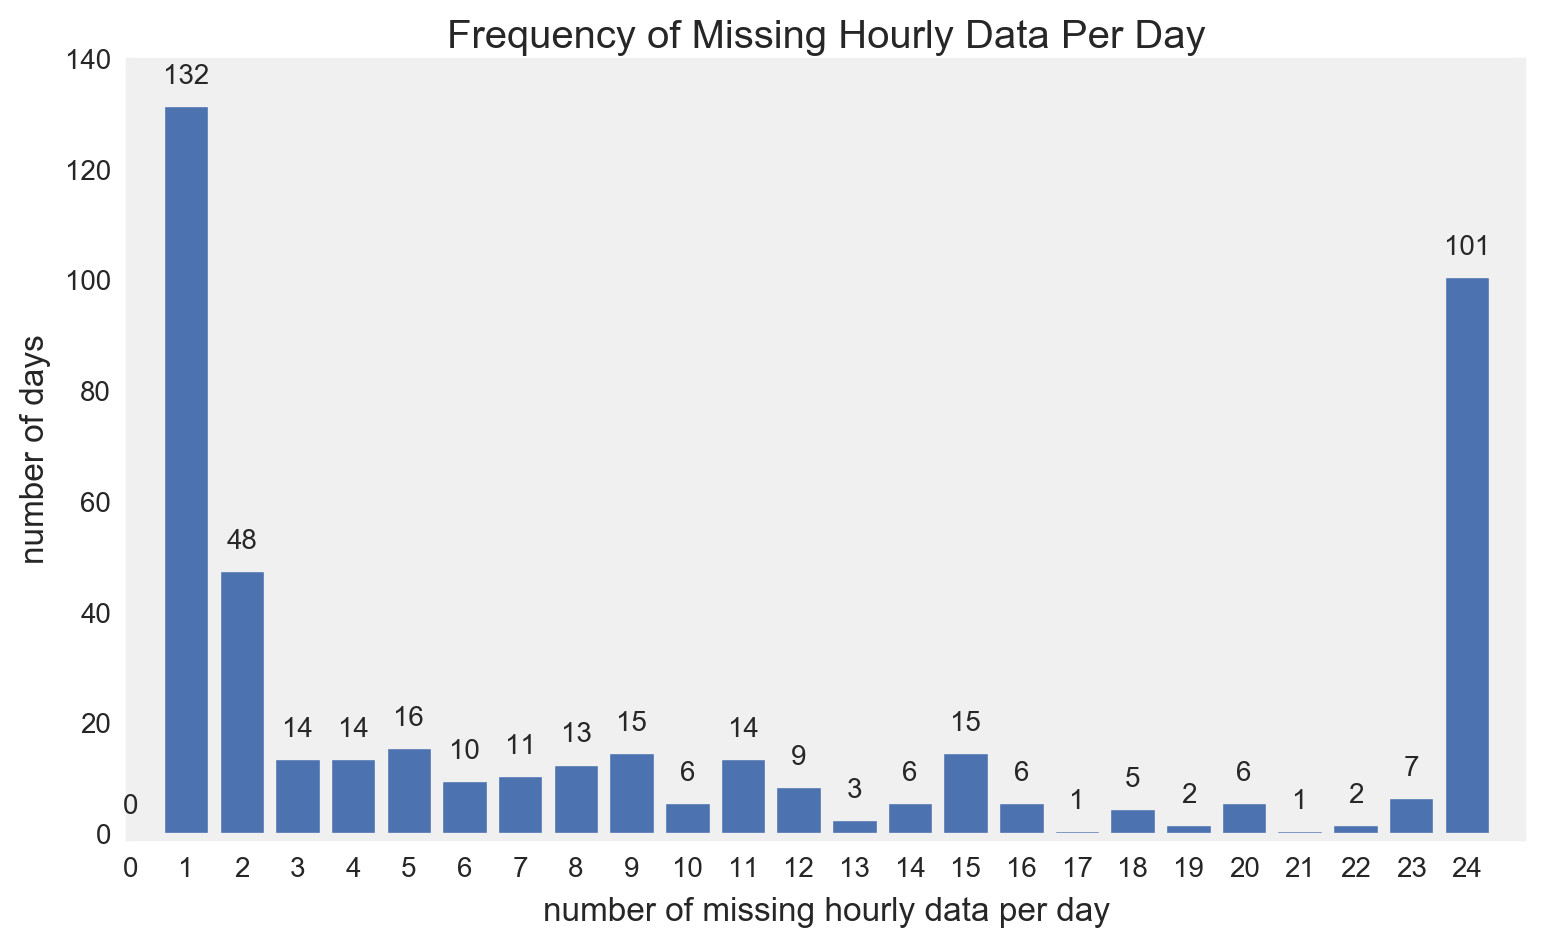

In [167]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(range(25), missing_data_freq, align='center')
ax.set(xticks=range(25), xlim=[0, 25])

ax.set_title("Frequency of Missing Hourly Data Per Day")
ax.set_xlabel("number of missing hourly data per day")
ax.set_ylabel("number of days")
ax.grid('off')

# Now make some labels
rects = ax.patches

for rect, label in zip(rects, missing_data_freq):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 3, label, ha='center', va='bottom')

# plt.savefig("image.png")
plt.show()

In [199]:
missing_data=[24, 18, 12, 6]
years = ['08', '09', '10', '11', '12', '13', '14', '15', '16']
for n in  missing_data:
    print '\n\n\n\nFor', n, 'or more missing data per day'
    dates_to_drop = invalid_dates[invalid_dates['Missing_value_counts']>= n].Date.tolist()
    print 'Total days to drop is', len(dates_to_drop)
    
    
    for j in years:
        print '-------------------------------------------------------------------------------------------------------'
        print "Year '",j
        drop = []
        for i in dates_to_drop:
            if i[-2:] == j:
                drop.append(i)
        print drop





For 24 or more missing data per day
Total days to drop is 101
-------------------------------------------------------------------------------------------------------
Year ' 08
['7/10/08']
-------------------------------------------------------------------------------------------------------
Year ' 09
['1/1/09', '1/10/09', '1/11/09', '1/12/09', '1/13/09', '1/14/09', '1/15/09', '1/16/09', '1/17/09', '1/18/09', '1/19/09', '1/2/09', '1/20/09', '1/21/09', '1/22/09', '1/23/09', '1/24/09', '1/25/09', '1/26/09', '1/27/09', '1/28/09', '1/29/09', '1/3/09', '1/30/09', '1/31/09', '1/4/09', '1/5/09', '1/6/09', '1/7/09', '1/8/09', '1/9/09', '11/16/09', '11/17/09', '12/25/09', '12/26/09', '12/27/09', '2/1/09', '2/10/09', '2/11/09', '2/12/09', '2/13/09', '2/14/09', '2/15/09', '2/16/09', '2/2/09', '2/27/09', '2/28/09', '2/3/09', '2/4/09', '2/5/09', '2/6/09', '2/7/09', '2/8/09', '2/9/09', '3/1/09', '3/2/09', '5/14/09', '5/15/09', '5/16/09', '5/17/09', '5/4/09', '5/5/09', '5/6/09', '6/5/09']
--------

In [213]:
years = ['08', '09', '10', '11', '12', '13', '14', '15', '16']

dates_to_drop = invalid_dates[(invalid_dates['Missing_value_counts']>= 6)
                                & (invalid_dates['Missing_value_counts']<12)].Date.tolist()
print 'Days with missing values between 6(inclusive) and 12 is', len(dates_to_drop)
    
    
for j in years:
    print '-------------------------------------------------------------------------------------------------------'
    print "Year '",j
    drop = []
    for i in dates_to_drop:
        if i[-2:] == j:
            drop.append(i)
    print drop

Days with missing values between 6(inclusive) and 12 is 69
-------------------------------------------------------------------------------------------------------
Year ' 08
['7/13/08', '7/16/08', '7/17/08', '7/19/08', '7/20/08', '7/21/08', '7/22/08', '7/23/08', '7/26/08', '8/15/08', '8/16/08', '8/23/08', '8/3/08', '8/5/08', '9/1/08', '9/2/08', '9/29/08', '9/30/08', '11/6/08']
-------------------------------------------------------------------------------------------------------
Year ' 09
['10/26/09', '10/29/09', '12/24/09', '12/28/09', '4/21/09', '4/26/09', '4/6/09', '4/8/09', '5/13/09', '6/22/09', '6/24/09', '7/5/09', '8/25/09']
-------------------------------------------------------------------------------------------------------
Year ' 10
['1/23/10', '1/26/10', '6/23/10', '6/7/10']
-------------------------------------------------------------------------------------------------------
Year ' 11
['1/8/11', '10/25/11', '10/26/11', '4/14/11', '4/21/11', '4/28/11', '4/29/11', '4/9/11', '

## There are many consecutive days with more than a quarter of the data missing in a day. I will drop all of them.
## Then impute missing data with KNN only if there are less than 6 data points missing.

### Days to drop:


In [300]:
dates_to_drop = invalid_dates[invalid_dates['Missing_value_counts']> 6].Date.tolist()
len(dates_to_drop)

223

In [305]:
223*23+10 #

5352

In [298]:
# number of rows to drop
print 'Total rows with negative values:', (np.array(range(25)) * np.array(missing_data_freq)).sum()
print 'Rows with 6 or less missing values a day:', (np.array(range(25)[0:7]) * np.array(missing_data_freq[0:7])).sum()
print 'Rows to drop with more than 6 missing values a day:', (np.array(range(25)) * np.array(missing_data_freq)).sum() \
- (np.array(range(25)[0:7]) * np.array(missing_data_freq[0:7])).sum()

Total rows with negative values: 4463
Rows with 6 or less missing values a day: 466
Rows to drop with more than 6 missing values a day: 3997


In [262]:
# add date column onto pm25
pm25['Date'] = pm25['Date (LST)'].apply(lambda x: x[0:-5].strip())

In [237]:
pm25.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
0,Beijing,PM2.5,4/8/08 15:00,2008,4,8,15,207,�g/mg_,1 Hr,Valid,4/8/08
1,Beijing,PM2.5,4/8/08 16:00,2008,4,8,16,180,�g/mg_,1 Hr,Valid,4/8/08
2,Beijing,PM2.5,4/8/08 17:00,2008,4,8,17,152,�g/mg_,1 Hr,Valid,4/8/08
3,Beijing,PM2.5,4/8/08 18:00,2008,4,8,18,162,�g/mg_,1 Hr,Valid,4/8/08
4,Beijing,PM2.5,4/8/08 19:00,2008,4,8,19,171,�g/mg_,1 Hr,Valid,4/8/08


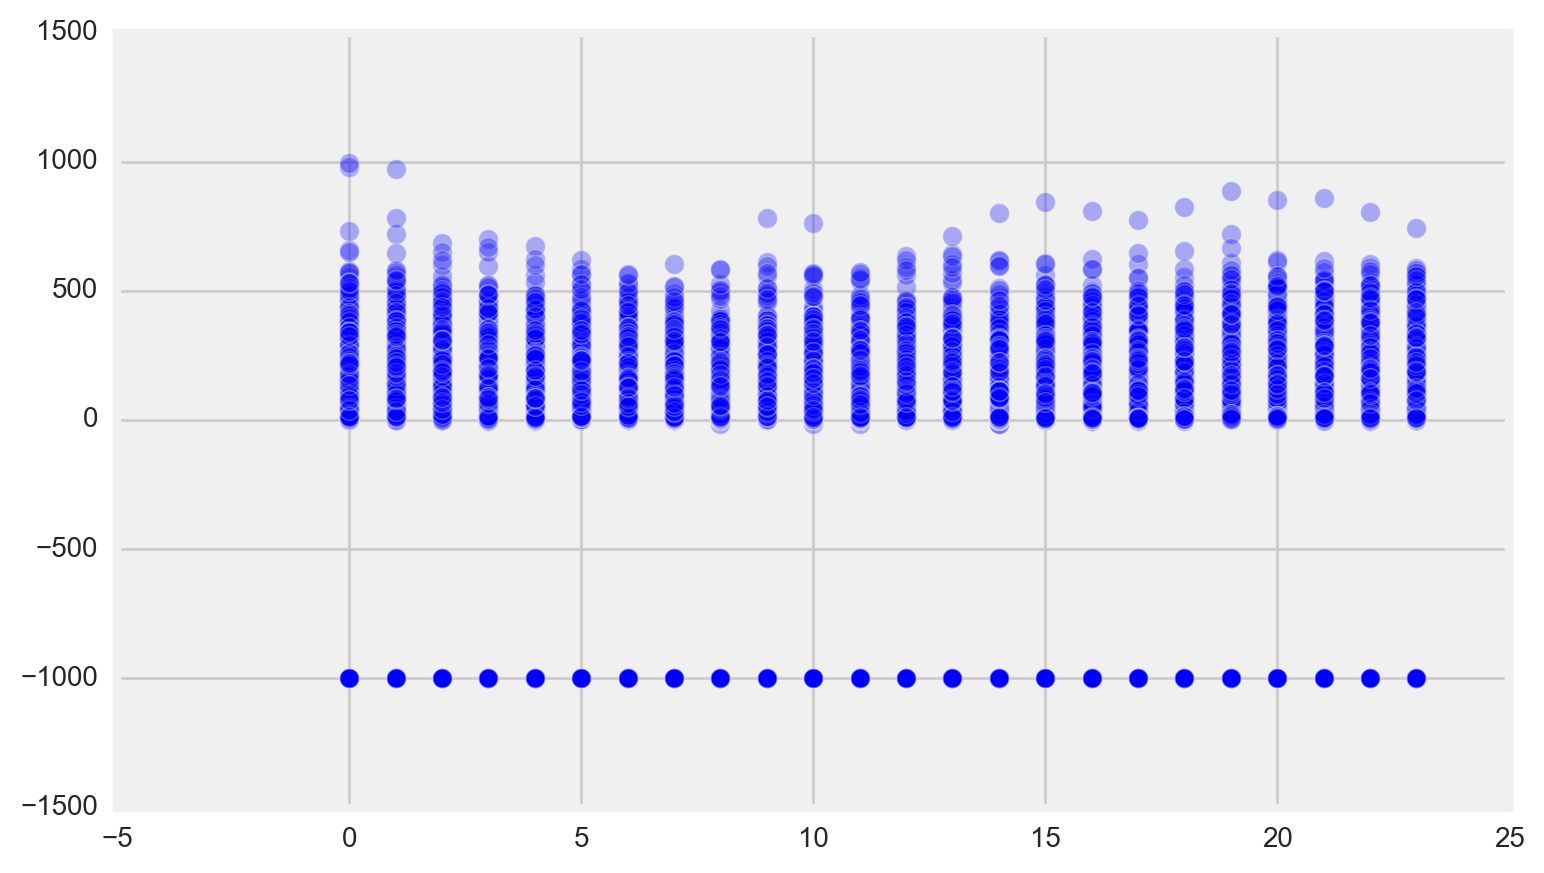

In [294]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(pm25.Hour, pm25.Value, alpha=0.3, s=50)
plt.show()

In [268]:
if pm25.Date.values.all() in dates_to_drop:
    pm25.drop(axis = 0, inplace = True)


In [301]:
def cust_funct(x):
    if x in dates_to_drop:
        return False
    else:
        return True

In [302]:
pm25_test = pm25[pm25['Date'].map(cust_funct)]

In [304]:
pm25.shape[0] - pm25_test.shape[0]

5342

In [279]:
dates_to_drop

['1/1/09',
 '1/1/10',
 '1/1/11',
 '1/10/09',
 '1/10/11',
 '1/11/09',
 '1/12/09',
 '1/13/09',
 '1/14/09',
 '1/14/12',
 '1/15/09',
 '1/15/12',
 '1/16/09',
 '1/16/12',
 '1/17/09',
 '1/17/12',
 '1/18/09',
 '1/19/09',
 '1/2/09',
 '1/20/09',
 '1/21/09',
 '1/22/09',
 '1/23/09',
 '1/23/10',
 '1/24/09',
 '1/24/10',
 '1/25/09',
 '1/25/10',
 '1/26/09',
 '1/26/10',
 '1/27/09',
 '1/28/09',
 '1/29/09',
 '1/3/09',
 '1/30/09',
 '1/31/09',
 '1/4/09',
 '1/5/09',
 '1/6/09',
 '1/7/09',
 '1/8/09',
 '1/8/11',
 '1/9/09',
 '1/9/11',
 '10/25/09',
 '10/25/11',
 '10/26/11',
 '10/27/11',
 '10/29/09',
 '10/3/11',
 '10/4/11',
 '10/5/11',
 '10/6/11',
 '10/7/11',
 '11/1/10',
 '11/16/09',
 '11/17/09',
 '11/18/09',
 '11/2/10',
 '11/20/12',
 '11/21/14',
 '11/3/10',
 '12/19/15',
 '12/20/09',
 '12/20/14',
 '12/21/09',
 '12/23/12',
 '12/24/09',
 '12/24/12',
 '12/25/09',
 '12/25/12',
 '12/26/09',
 '12/26/12',
 '12/27/09',
 '12/27/12',
 '12/28/09',
 '12/28/12',
 '12/29/13',
 '12/30/13',
 '12/9/14',
 '2/1/09',
 '2/10/09',
 '2

In [280]:
pm25_test[pm25_test['Date'] == '4/15/11']

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date


In [269]:
pm25.shape

(74471, 12)

### Days to impute:

In [234]:
dates_to_impute = invalid_dates[(invalid_dates['Missing_value_counts']<= 6)].Date.tolist()
len(dates_to_impute)

234

In [228]:
# Sample date with 6 missing data

pm25[(pm25.Year==2008) & (pm25.Month==11) & (pm25.Day==6)]

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
5073,Beijing,PM2.5,11/6/08 0:00,2008,11,6,0,73,�g/mg_,1 Hr,Valid
5074,Beijing,PM2.5,11/6/08 1:00,2008,11,6,1,38,�g/mg_,1 Hr,Valid
5075,Beijing,PM2.5,11/6/08 2:00,2008,11,6,2,31,�g/mg_,1 Hr,Valid
5076,Beijing,PM2.5,11/6/08 3:00,2008,11,6,3,30,�g/mg_,1 Hr,Valid
5077,Beijing,PM2.5,11/6/08 4:00,2008,11,6,4,28,�g/mg_,1 Hr,Valid
5078,Beijing,PM2.5,11/6/08 5:00,2008,11,6,5,28,�g/mg_,1 Hr,Valid
5079,Beijing,PM2.5,11/6/08 6:00,2008,11,6,6,33,�g/mg_,1 Hr,Valid
5080,Beijing,PM2.5,11/6/08 7:00,2008,11,6,7,31,�g/mg_,1 Hr,Valid
5081,Beijing,PM2.5,11/6/08 8:00,2008,11,6,8,42,�g/mg_,1 Hr,Valid
5082,Beijing,PM2.5,11/6/08 9:00,2008,11,6,9,42,�g/mg_,1 Hr,Valid


In [217]:
pm25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74471 entries, 0 to 8039
Data columns (total 11 columns):
Site          74471 non-null object
Parameter     74471 non-null object
Date (LST)    74471 non-null object
Year          74471 non-null int64
Month         74471 non-null int64
Day           74471 non-null int64
Hour          74471 non-null int64
Value         74471 non-null int64
Unit          74471 non-null object
Duration      74471 non-null object
QC Name       74471 non-null object
dtypes: int64(5), object(6)
memory usage: 6.8+ MB
